As mentionned in [logbook May-23](/posts/2023-05-01-logbook-May-23.html#jupyter-4.0-is-out), jupyter lab v4 is now available.

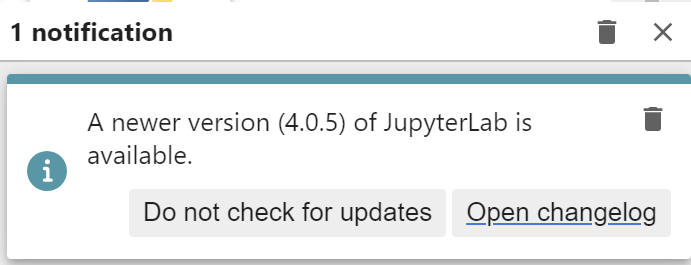

# clean jupyterlab config files

2 config files in linux:

- `.jupyter`

- `.local/share/jupyter`

I have removed them (actually mv with `_backup_<date>` suffix

# create `base_jupyter_v4` environment

Here is how I created it

# launch it as a service

As explained in [WSL2 on a fresh new PC / jupyter lab](/posts/2022-12-15-wsl2-fresh-pc.html#jupyter-lab)

I have setup jupyterlab as a service. Jupyter lab is automatically started with WSL.

thanks to
- `/etc/systemd/system/jupyterlab.service` nothing to be changed here

- `~/bin/jupyterlab` and here I have to update to `base_jupyter` to `base_jupyter_v4`

- `~/bin/jupyterlab.sh`, `~/bin/jupyterlab.sh` nothing to be changed here

In [2]:
!cat /home/guillaume/bin/jupyterlab

#!/bin/bash
cd ~
source ~/miniconda/etc/profile.d/conda.sh
conda activate base_jupyter_v4
jupyter lab


Then enable this service

```bash
chmod +x /home/guillaume/bin/jupyterlab.sh
sudo systemctl daemon-reload
sudo systemctl enable jupyterlab.service
sudo systemctl restart jupyterlab.service
```

and to monitor logs of this service
```bash
journalctl -xefu jupyterlab
```

Just pointing to http://localhost:8888/lab

# unit test

## tqdm

In [3]:
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)


1st loop:   0%|          | 0/3 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

## ipywidgets

In [4]:
import ipywidgets
ipywidgets.__version__

'8.1.1'

In [5]:
ipywidgets.widgets.Button(description="Hello World!")

Button(description='Hello World!', style=ButtonStyle())